In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import os
import pandas as pd
import math as math
import numpy as np

In [2]:
def read_networks(file_names):
    networks =[]
    for f in file_names:
        pjk = nx.read_pajek(f)
        
        net=nx.Graph(pjk)
        networks.append(net)
    return networks

In [3]:
def read_network_properties(network):
    degrees = network.degree()
    
    net_properties = { 
                       "network": network,
                       "number_of_nodes": len(network),
                       "number_of_edges": nx.number_of_edges(network),
                       "min_degree": min(degrees, key=lambda d: d[1])[1],
                       "max_degree": max(degrees, key=lambda d: d[1])[1],
                       "avg_degree": sum(d[1] for d in degrees) / len(degrees),
                       "average_clustering_coefficient": nx.average_clustering(network),
                       "assortativity": nx.degree_assortativity_coefficient(network, weight=None),
                       "average_shortest_path_length": nx.average_shortest_path_length(network),
                       "diameter": nx.diameter(network)
                      
    }
    
    return net_properties


In [884]:
def plot_ccdf(nt):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    degrees = [d for n, d in nt[1]['network'].degree()]
    sorted_vals = np.sort(np.unique(degrees))
    ccdf = np.zeros(len(sorted_vals))
    n = float(len(degrees))
    for i, val in enumerate(sorted_vals):
        ccdf[i] = np.sum(degrees >= val)/n

    ax.plot(sorted_vals, ccdf, "-")
    
    ax.set_xscale('log')
    ax.set_xlabel('Degree k')
    ax.set_yscale('log')
    ax.set_ylabel('Fraction Pk of vertices having degree k')
    ax.grid()
    ax.set_title("log-log, CCDF: " + nt[0], 
            transform=ax.transAxes)


In [862]:
def plot_log_log_histogram(n, n_bins):
    k_min = n[1]['min_degree']
    k_max = n[1]['max_degree']+1
 
    fig, ax = plt.subplots()
    bins = np.logspace(np.log10(np.min(k_min)), 
                       np.log10(np.max(k_max+1)), 
                       num=n_bins)
    ax.hist(np.asarray([d for n, d in n[1]['network'].degree() if n != 0]), normed=True, bins=bins)
    ax.set_xscale('log')
    ax.set_xlabel('Degree k')
    ax.set_yscale('log',nonposy='clip')
    ax.set_ylabel('Fraction Pk of vertices having degree k')
    plt.title(f"PDF for network {n[0]} - {n_bins} bins")

In [856]:
def plot_degree_histogram(n):
    deg, cnt = np.unique(sorted([d for n, d in n[1]['network'].degree()]), return_counts=True)
    
    fig, ax = plt.subplots()
    plt.bar(deg, cnt / np.sum(cnt), align='center')
    
    plt.title(f"Degree Histogram for network {n[0]}")
    plt.ylabel("P(k)")
    plt.xlabel("k")
    ax.set_xticks([d + 0.4 for d in deg])
    ax.set_xticklabels(deg)

In [4]:
file_list = ['toy/circle9.net', 'toy/star.net', 'toy/graph3+1+3.net', 'toy/grid-p-6x6.net' 
            ,'model/homorand_N1000_K4_0.net', 'model/ER1000k8.net', 'model/SF_1000_g2.7.net' 
            ,'model/ws1000.net', 'real/zachary_unwh.net', 'real/airports_UW.net']

#list_to_plot = ['model/ER1000k8.net', 'model/SF_1000_g2.7.net', 'model/ws1000.net', 'real/airports_UW.net']

In [5]:
net_props = list(zip(file_list, [read_network_properties(n) for n in read_networks(file_list)]))

C:\Users\rafae\AppData\Roaming\Python\Python36\site-packages\networkx\algorithms\assortativity\correlation.py:288: RuntimeWarning: invalid value encountered in double_scalars
  return (xy * (M - ab)).sum() / numpy.sqrt(vara * varb)


In [840]:
#Using pandas just to get a pretty output table

data = pd.DataFrame()

for net in net_props:
    data = data.append({'Network': net[0], '# Nodes': "{:d}".format(net[1]['number_of_nodes']), '# Edges': "{:d}".format(net[1]['number_of_edges'])
                       , 'Min Degree': "{:d}".format(net[1]['min_degree']), 'Max Degree': "{:d}".format(net[1]['max_degree']), 'Avg Degree': "{:.4f}".format(net[1]['avg_degree'])
                       , 'Clustering Coefficient': "{:.4f}".format(net[1]['average_clustering_coefficient']), 'Assortativity': "{:+.4f}".format(net[1]['assortativity'])
                       , 'Average Path Lenght': "{:.4f}".format(net[1]['average_shortest_path_length']), 'Diameter': "{:.4f}".format(net[1]['diameter'])}, ignore_index=True)

data


,# Edges,# Nodes,Assortativity,Average Path Lenght,Avg Degree,Clustering Coefficient,Diameter,Max Degree,Min Degree,Network
0,9,9,+nan,2.5000,2.0000,0.0000,4.0000,2,2,toy/circle9.net
1,8,9,-1.0000,1.7778,1.7778,0.0000,2.0000,8,1,toy/star.net
2,8,7,-0.6000,2.1905,2.2857,0.6667,4.0000,3,2,toy/graph3+1+3.net
3,72,36,+nan,3.0857,4.0000,0.0000,6.0000,4,4,toy/grid-p-6x6.net
4,2000,1000,+nan,5.6400,4.0000,0.0020,9.0000,4,4,model/homorand_N1000_K4_0.net
5,3956,1000,-0.0168,3.5698,7.9120,0.0080,6.0000,17,1,model/ER1000k8.net
6,1668,1000,-0.0020,5.4688,3.3360,0.0067,12.0000,24,2,model/SF_1000_g2.7.net
7,3000,1000,-0.0999,4.0913,6.0000,0.0044,6.0000,13,3,model/ws1000.net
8,78,34,-0.4756,2.4082,4.5882,0.5706,5.0000,17,1,real/zachary_unwh.net
9,14142,3618,+0.0462,4.4396,7.8176,0.4957,17.0000,250,1,real/airports_UW.net


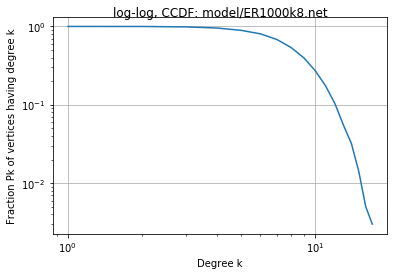

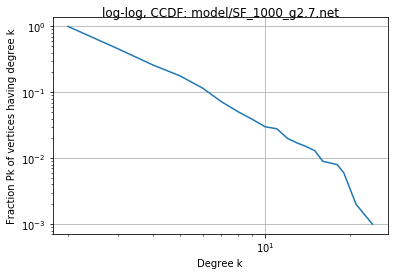

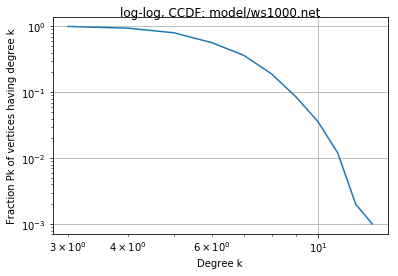

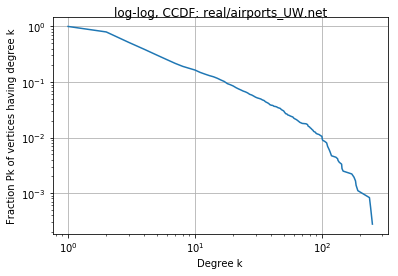

In [885]:
#list_to_plot = [5'model/ER1000k8.net', 6'model/SF_1000_g2.7.net', 7'model/ws1000.net', 9'real/airports_UW.net']


plot_ccdf(net_props[5])
plot_ccdf(net_props[6])
plot_ccdf(net_props[7])
plot_ccdf(net_props[9])